#Libraries

In [ ]:
import pandas as pd
import numpy as np
import json, ast, time
import sys
from tqdm.notebook import tqdm
from scipy.stats import pearsonr, spearmanr,kendalltau
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data_path = "<excel-file-path>"


# Case Study of GPT-4 Evaluation on GPT-3.5

Case Study is done only on the Prompt Level 3 and 4 responses of GPT-3.5

In [ ]:
# read the excel file containg human and GPT evalution for GPT-3.5 for 4 prompts

llm2_eval = pd.read_excel(data_path + "GPT-rating_LLM2.xlsx")
llm2_eval.columns

##Prompt 3 (All Aspect)

In [ ]:
## Select annotation scores only for prompt 3
low_p3_llm2 = llm2_eval[['Paper#', 'Accepted/ Rejected', 'Eval_Type','LLM2P3[CC-P]',
       'LLM2P3[CC-R]', 'LLM2P3[CS-P]', 'LLM2P3[CS-R]', 'LLM2P3[CW-P]',
       'LLM2P3[CW-R]', 'LLM2P3[SI-P]', 'LLM2P3[SI-R]', 'LLM2P3[MR-P]',
       'LLM2P3[MR-R]']]
human_eval = low_p3_llm2[low_p3_llm2['Eval_Type'] == 'Human'].reset_index(drop = True)
gpt_eval = low_p3_llm2[low_p3_llm2['Eval_Type'] == 'GPT'].reset_index(drop = True)



**Looked at the Samples where:**

1. Human and GPT both gives equal rating in both P and R
2. Human gives higher in both P and R
3. GPT gives higher in both P and R
4. GPT Gives x more High than humans

Other conditions also checked but including could make the analysis more ambigous.

### Core Contribution

In [ ]:
column_names = human_eval.columns
all_eq = 0

print("\tHuman and GPT Equal in Both PR")
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,3:5].values- gpt_eval.iloc[i,3:5].values ==0)  :
        all_eq = all_eq + 1

print("Total#", all_eq)


	Human and GPT Equal in Both PR
Total# 7


In [ ]:
hum_high_eq = 0
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,3:5].values- gpt_eval.iloc[i,3:5].values >0)  :
        hum_high_eq = hum_high_eq  + 1

print("Human Gives High in Both PR# ", hum_high_eq)

Human Gives High in Both PR#  0


In [ ]:
gpt_all_high = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,3:5].values- gpt_eval.iloc[i,3:5].values <=-1)  :
        gpt_all_high = gpt_all_high + 1

print("GPT Gives High in both P and R# ", gpt_all_high)


GPT Gives High in both P and R#  23


In [ ]:
gpt_1 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference 1 in terms of human vs GPT
    if np.all(human_eval.iloc[i,3:5].values- gpt_eval.iloc[i,3:5].values ==-1)  :
        gpt_1 = gpt_1 + 1

print("GPT Gives 1 High in Both PR", gpt_1)


GPT Gives 1 High in Both PR 11


In [ ]:
gpt_2 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,3:5].values- gpt_eval.iloc[i,3:5].values ==-2)  :
        gpt_2 = gpt_2 + 1

print("GPT Gives 2 High in Both PR#", gpt_2)


GPT Gives 2 High in Both PR# 3


In [ ]:
gpt_3 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,3:5].values- gpt_eval.iloc[i,3:5].values ==-3)  :
        gpt_3 = gpt_3 + 1

print("GPT Gives 3 High in Both PR", gpt_3)


GPT Gives 3 High in Both PR 0


In [ ]:
gpt_4 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,3:5].values- gpt_eval.iloc[i,3:5].values ==-4)  :
        gpt_4 = gpt_4 + 1

print("GPT Gives 4 High in Both PR", gpt_4)


GPT Gives 4 High in Both PR 0


### Common Strengths

In [ ]:
column_names = human_eval.columns
all_eq = 0

print("\tHuman and GPT Equal in Both PR")
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,5:7].values- gpt_eval.iloc[i,5:7].values ==0)  :
        all_eq = all_eq + 1

print("Total#", all_eq)


	Human and GPT Equal in Both PR
Total# 5


In [ ]:
hum_high_eq = 0
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,5:7].values- gpt_eval.iloc[i,5:7].values >0)  :
        hum_high_eq = hum_high_eq  + 1

print("Human Gives High in Both PR# ", hum_high_eq)

Human Gives High in Both PR#  2


In [ ]:
gpt_all_high = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,5:7].values- gpt_eval.iloc[i,5:7].values <=-1)  :
        gpt_all_high = gpt_all_high + 1

print("GPT Gives High in both P and R# ", gpt_all_high)


GPT Gives High in both P and R#  21


In [ ]:
gpt_1 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,5:7].values- gpt_eval.iloc[i,5:7].values ==-1)  :
        gpt_1 = gpt_1 + 1

print("GPT Gives 1 High in Both PR", gpt_1)


GPT Gives 1 High in Both PR 4


In [ ]:
gpt_2 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,5:7].values- gpt_eval.iloc[i,5:7].values ==-2)  :
        gpt_2 = gpt_2 + 1

print("GPT Gives 2 High in Both PR#", gpt_2)


GPT Gives 2 High in Both PR# 4


In [ ]:
gpt_3 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,5:7].values- gpt_eval.iloc[i,5:7].values ==-3)  :
        gpt_3 = gpt_3 + 1

print("GPT Gives 3 High in Both PR", gpt_3)


GPT Gives 3 High in Both PR 1


In [ ]:
gpt_4 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,5:7].values- gpt_eval.iloc[i,5:7].values ==-4)  :
        gpt_4 = gpt_4 + 1

print("GPT Gives 4 High in Both PR", gpt_4)


GPT Gives 4 High in Both PR 0


### Common Weakness

In [ ]:
column_names = human_eval.columns
all_eq = 0

print("\tHuman and GPT Equal in Both PR")
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,7:9].values- gpt_eval.iloc[i,7:9].values ==0)  :
        all_eq = all_eq + 1

print("Total#", all_eq)


	Human and GPT Equal in Both PR
Total# 4


In [ ]:
hum_high_eq = 0
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,7:9].values- gpt_eval.iloc[i,7:9].values >0)  :
        hum_high_eq = hum_high_eq  + 1

print("Human Gives High in Both PR# ", hum_high_eq)

Human Gives High in Both PR#  1


In [ ]:
gpt_all_high = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,7:9].values- gpt_eval.iloc[i,7:9].values <=-1)  :
        gpt_all_high = gpt_all_high + 1

print("GPT Gives High in both P and R# ", gpt_all_high)


GPT Gives High in both P and R#  23


In [ ]:
gpt_1 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,7:9].values- gpt_eval.iloc[i,7:9].values ==-1)  :
        gpt_1 = gpt_1 + 1

print("GPT Gives 1 High in Both PR", gpt_1)


GPT Gives 1 High in Both PR 6


In [ ]:
gpt_2 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,7:9].values- gpt_eval.iloc[i,7:9].values ==-2)  :
        gpt_2 = gpt_2 + 1

print("GPT Gives 2 High in Both PR#", gpt_2)


GPT Gives 2 High in Both PR# 3


In [ ]:
gpt_3 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,7:9].values- gpt_eval.iloc[i,7:9].values ==-3)  :
        gpt_3 = gpt_3 + 1

print("GPT Gives 3 High in Both PR", gpt_3)


GPT Gives 3 High in Both PR 1


In [ ]:
gpt_4 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,7:9].values- gpt_eval.iloc[i,7:9].values ==-4)  :
        gpt_4 = gpt_4 + 1

print("GPT Gives 4 High in Both PR", gpt_4)


GPT Gives 4 High in Both PR 0


### Suggestions for Improvement

In [ ]:
column_names = human_eval.columns
all_eq = 0

print("\tHuman and GPT Equal in Both PR")
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,9:11].values- gpt_eval.iloc[i,9:11].values ==0)  :
        all_eq = all_eq + 1

print("Total#", all_eq)


	Human and GPT Equal in Both PR
Total# 5


In [ ]:
hum_high_eq = 0
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,9:11].values- gpt_eval.iloc[i,9:11].values >0)  :
        hum_high_eq = hum_high_eq  + 1

print("Human Gives High in Both PR# ", hum_high_eq)

Human Gives High in Both PR#  0


In [ ]:
gpt_all_high = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,9:11].values- gpt_eval.iloc[i,9:11].values <=-1)  :
        gpt_all_high = gpt_all_high + 1

print("GPT Gives High in both P and R# ", gpt_all_high)


GPT Gives High in both P and R#  23


In [ ]:
gpt_1 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,9:11].values- gpt_eval.iloc[i,9:11].values ==-1)  :
        gpt_1 = gpt_1 + 1

print("GPT Gives 1 High in Both PR", gpt_1)


GPT Gives 1 High in Both PR 6


In [ ]:
gpt_2 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,9:11].values- gpt_eval.iloc[i,9:11].values ==-2)  :
        gpt_2 = gpt_2 + 1

print("GPT Gives 2 High in Both PR#", gpt_2)


GPT Gives 2 High in Both PR# 3


In [ ]:
gpt_3 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,9:11].values- gpt_eval.iloc[i,9:11].values ==-3)  :
        gpt_3 = gpt_3 + 1

print("GPT Gives 3 High in Both PR", gpt_3)


GPT Gives 3 High in Both PR 3


In [ ]:
gpt_4 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,9:11].values- gpt_eval.iloc[i,9:11].values ==-4)  :
        gpt_4 = gpt_4 + 1

print("GPT Gives 4 High in Both PR", gpt_4)


GPT Gives 4 High in Both PR 0


### Missing Reference

In [ ]:
column_names = human_eval.columns
all_eq = 0

print("\tHuman and GPT Equal in Both PR")
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,11:13].values- gpt_eval.iloc[i,11:13].values ==0)  :
        all_eq = all_eq + 1

print("Total#", all_eq)


	Human and GPT Equal in Both PR
Total# 16


In [ ]:
hum_high_eq = 0
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,11:13].values- gpt_eval.iloc[i,11:13].values >0)  :
        hum_high_eq = hum_high_eq  + 1

print("Human Gives High in Both PR# ", hum_high_eq)

Human Gives High in Both PR#  1


In [ ]:
gpt_all_high = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,11:13].values- gpt_eval.iloc[i,11:13].values <=-1)  :
        gpt_all_high = gpt_all_high + 1

print("GPT Gives High in both P and R# ", gpt_all_high)


GPT Gives High in both P and R#  22


In [ ]:
gpt_1 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,11:13].values- gpt_eval.iloc[i,11:13].values ==-1)  :
        gpt_1 = gpt_1 + 1

print("GPT Gives 1 High in Both PR", gpt_1)


GPT Gives 1 High in Both PR 2


In [ ]:
gpt_2 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,11:13].values- gpt_eval.iloc[i,11:13].values ==-2)  :
        gpt_2 = gpt_2 + 1

print("GPT Gives 2 High in Both PR#", gpt_2)


GPT Gives 2 High in Both PR# 5


In [ ]:
gpt_3 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,11:13].values- gpt_eval.iloc[i,11:13].values ==-3)  :
        gpt_3 = gpt_3 + 1

print("GPT Gives 3 High in Both PR", gpt_3)


GPT Gives 3 High in Both PR 6


In [ ]:
gpt_4 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,11:13].values- gpt_eval.iloc[i,11:13].values ==-4)  :
        gpt_4 = gpt_4 + 1

print("GPT Gives 4 High in Both PR", gpt_4)


GPT Gives 4 High in Both PR 7


### GPT provides High in P3 Plot

In [ ]:
data_matrix = pd.DataFrame({'H=G':[7,5,4,5,16],
                            'H>G':[0,2,1,0,1],
                            'G>H':[23,21,23,23,22],
                            'G=1+H':[11,4,6,6,2],
                            'G=2+H':[3,4,3,3,5],
                            'G=3+H':[0,1,1,3,6],
                            'G=4+H':[0,0,0,0,0],

                            'Aspect':['CC','CS','CW','SI','MR']})
df = pd.melt(data_matrix, id_vars='Aspect', var_name="Category", value_name="Values")
print(df)

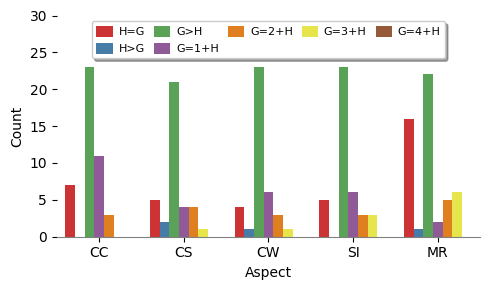

In [ ]:
aspect_names = ['CC','CS','CW','SI','MR']
plt.figure(figsize=(5, 3))

    # bar plot
splot = sns.barplot(data=df,x='Aspect', y='Values' ,hue='Category',palette="Set1")

#plt.title("Evaluators Score Count GPT3.5-P3")
plt.xlabel("Aspect")
plt.ylabel("Count")
plt.ylim([0,30])
    # Adjust legend to horizontal
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), fancybox=True, shadow=True, ncol=5,
           fontsize=8, handletextpad=0.5, columnspacing=0.8, handlelength=1.5, handleheight=1.2
)
ax = plt.gca()
ax.spines['bottom'].set_color("gray")
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(results_path+'gpt_high_score_P3.png',dpi = 400,bbox_inches ='tight')
plt.tight_layout()  # Ensures all elements fit within the figure area

##Prompt 4 (All Aspect)

In [ ]:
# Select the Prompt 4 for Annotations

low_p4_llm2 = llm2_eval[['Paper#', 'Accepted/ Rejected', 'Eval_Type','LLM2P4[CC-P]',
       'LLM2P4[CC-R]', 'LLM2P4[CS-P]', 'LLM2P4[CS-R]', 'LLM2P4[CW-P]',
       'LLM2P4[CW-R]', 'LLM2P4[SI-P]', 'LLM2P4[SI-R]', 'LLM2P4[MR-P]',
       'LLM2P4[MR-R]']]
human_eval = low_p4_llm2[low_p4_llm2['Eval_Type'] == 'Human'].reset_index(drop = True)
gpt_eval = low_p4_llm2[low_p4_llm2['Eval_Type'] == 'GPT'].reset_index(drop = True)
# human_eval


**Looked at the Samples where:**

1. Human and GPT both gives equal rating in both P and R
2. Human gives higher in both P and R
3. GPT gives higher in both P and R
4. GPT Gives x more High

Other conditions also checked but including could make the analysis more ambigous.

###Core Contribution

In [ ]:
column_names = human_eval.columns
all_eq = 0

print("\tHuman and GPT Equal in Both PR")
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,3:5].values- gpt_eval.iloc[i,3:5].values ==0)  :
        all_eq = all_eq + 1

print("Total#", all_eq)


	Human and GPT Equal in Both PR
Total# 9


In [ ]:
hum_high_eq = 0
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,3:5].values- gpt_eval.iloc[i,3:5].values >0)  :
        hum_high_eq = hum_high_eq  + 1

print("Human Gives High in Both PR# ", hum_high_eq)

Human Gives High in Both PR#  1


In [ ]:
gpt_all_high = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,3:5].values- gpt_eval.iloc[i,3:5].values <=-1)  :
        gpt_all_high = gpt_all_high + 1

print("GPT Gives High in both P and R# ", gpt_all_high)


GPT Gives High in both P and R#  19


In [ ]:
gpt_1 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,3:5].values- gpt_eval.iloc[i,3:5].values ==-1)  :
        gpt_1 = gpt_1 + 1

print("GPT Gives 1 High in Both PR", gpt_1)


GPT Gives 1 High in Both PR 8


In [ ]:
gpt_2 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,3:5].values- gpt_eval.iloc[i,3:5].values ==-2)  :
        gpt_2 = gpt_2 + 1

print("GPT Gives 2 High in Both PR#", gpt_2)


GPT Gives 2 High in Both PR# 2


In [ ]:
gpt_3 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,3:5].values- gpt_eval.iloc[i,3:5].values ==-3)  :
        gpt_3 = gpt_3 + 1

print("GPT Gives 3 High in Both PR", gpt_3)


GPT Gives 3 High in Both PR 0


In [ ]:
gpt_4 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,3:5].values- gpt_eval.iloc[i,3:5].values ==-4)  :
        gpt_4 = gpt_4 + 1

print("GPT Gives 4 High in Both PR", gpt_4)


GPT Gives 4 High in Both PR 0


### Common Strengths

In [ ]:
column_names = human_eval.columns
all_eq = 0

print("\tHuman and GPT Equal in Both PR")
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,5:7].values- gpt_eval.iloc[i,5:7].values ==0)  :
        all_eq = all_eq + 1

print("Total#", all_eq)


	Human and GPT Equal in Both PR
Total# 6


In [ ]:
hum_high_eq = 0
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,5:7].values- gpt_eval.iloc[i,5:7].values >0)  :
        hum_high_eq = hum_high_eq  + 1

print("Human Gives High in Both PR# ", hum_high_eq)

Human Gives High in Both PR#  3


In [ ]:
gpt_all_high = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,5:7].values- gpt_eval.iloc[i,5:7].values <=-1)  :
        gpt_all_high = gpt_all_high + 1

print("GPT Gives High in both P and R# ", gpt_all_high)


GPT Gives High in both P and R#  18


In [ ]:
gpt_1 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than 1 in terms of human vs GPT
    if np.all(human_eval.iloc[i,5:7].values- gpt_eval.iloc[i,5:7].values ==-1)  :
        gpt_1 = gpt_1 + 1

print("GPT Gives 1 High in Both PR", gpt_1)


GPT Gives 1 High in Both PR 8


In [ ]:
gpt_2 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,5:7].values- gpt_eval.iloc[i,5:7].values ==-2)  :
        gpt_2 = gpt_2 + 1

print("GPT Gives 2 High in Both PR#", gpt_2)


GPT Gives 2 High in Both PR# 1


In [ ]:
gpt_3 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,5:7].values- gpt_eval.iloc[i,5:7].values ==-3)  :
        gpt_3 = gpt_3 + 1

print("GPT Gives 3 High in Both PR", gpt_3)


GPT Gives 3 High in Both PR 2


In [ ]:
gpt_4 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,5:7].values- gpt_eval.iloc[i,5:7].values ==-4)  :
        gpt_4 = gpt_4 + 1

print("GPT Gives 4 High in Both PR", gpt_4)


GPT Gives 4 High in Both PR 1


### Common Weakness

In [ ]:
column_names = human_eval.columns
all_eq = 0

print("\tHuman and GPT Equal in Both PR")
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,7:9].values- gpt_eval.iloc[i,7:9].values ==0)  :
        all_eq = all_eq + 1

print("Total#", all_eq)


	Human and GPT Equal in Both PR
Total# 6


In [ ]:
hum_high_eq = 0
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,7:9].values- gpt_eval.iloc[i,7:9].values >0)  :
        hum_high_eq = hum_high_eq  + 1

print("Human Gives High in Both PR# ", hum_high_eq)

Human Gives High in Both PR#  2


In [ ]:
gpt_all_high = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,7:9].values- gpt_eval.iloc[i,7:9].values <=-1)  :
        gpt_all_high = gpt_all_high + 1

print("GPT Gives High in both P and R# ", gpt_all_high)

GPT Gives High in both P and R#  20


In [ ]:
gpt_1 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,7:9].values- gpt_eval.iloc[i,7:9].values ==-1)  :
        gpt_1 = gpt_1 + 1

print("GPT Gives 1 High in Both PR", gpt_1)


GPT Gives 1 High in Both PR 4


In [ ]:
gpt_2 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,7:9].values- gpt_eval.iloc[i,7:9].values ==-2)  :
        gpt_2 = gpt_2 + 1

print("GPT Gives 2 High in Both PR#", gpt_2)


GPT Gives 2 High in Both PR# 4


In [ ]:
gpt_3 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,7:9].values- gpt_eval.iloc[i,7:9].values ==-3)  :
        gpt_3 = gpt_3 + 1

print("GPT Gives 3 High in Both PR", gpt_3)


GPT Gives 3 High in Both PR 1


In [ ]:
gpt_4 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,7:9].values- gpt_eval.iloc[i,7:9].values ==-4)  :
        gpt_4 = gpt_4 + 1

print("GPT Gives 4 High in Both PR", gpt_4)


GPT Gives 4 High in Both PR 0


### Suggestions for Improvement

In [ ]:
column_names = human_eval.columns
all_eq = 0

print("\tHuman and GPT Equal in Both PR")
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,9:11].values- gpt_eval.iloc[i,9:11].values ==0)  :
        all_eq = all_eq + 1

print("Total#", all_eq)


	Human and GPT Equal in Both PR
Total# 4


In [ ]:
hum_high_eq = 0
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,9:11].values- gpt_eval.iloc[i,9:11].values >0)  :
        hum_high_eq = hum_high_eq  + 1

print("Human Gives High in Both PR# ", hum_high_eq)

Human Gives High in Both PR#  1


In [ ]:
gpt_all_high = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,9:11].values- gpt_eval.iloc[i,9:11].values <=-1)  :

        gpt_all_high = gpt_all_high + 1

print("GPT Gives High in both P and R# ", gpt_all_high)


GPT Gives High in both P and R#  21


In [ ]:
gpt_1 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,9:11].values- gpt_eval.iloc[i,9:11].values ==-1)  :
        gpt_1 = gpt_1 + 1

print("GPT Gives 1 High in Both PR", gpt_1)


GPT Gives 1 High in Both PR 4


In [ ]:
gpt_2 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,9:11].values- gpt_eval.iloc[i,9:11].values ==-2)  :
        gpt_2 = gpt_2 + 1

print("GPT Gives 2 High in Both PR#", gpt_2)


GPT Gives 2 High in Both PR# 1


In [ ]:
gpt_3 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,9:11].values- gpt_eval.iloc[i,9:11].values ==-3)  :
        gpt_3 = gpt_3 + 1

print("GPT Gives 3 High in Both PR", gpt_3)


GPT Gives 3 High in Both PR 2


In [ ]:
gpt_4 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,9:11].values- gpt_eval.iloc[i,9:11].values ==-4)  :
        gpt_4 = gpt_4 + 1

print("GPT Gives 4 High in Both PR", gpt_4)


GPT Gives 4 High in Both PR 1


### Missing Reference

In [ ]:
column_names = human_eval.columns
all_eq = 0

print("\tHuman and GPT Equal in Both PR")
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,11:13].values- gpt_eval.iloc[i,11:13].values ==0)  :
        all_eq = all_eq + 1

print("Total#", all_eq)


	Human and GPT Equal in Both PR
Total# 8


In [ ]:
hum_high_eq = 0
for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,11:13].values- gpt_eval.iloc[i,11:13].values >0)  :
        hum_high_eq = hum_high_eq  + 1

print("Human Gives High in Both PR# ", hum_high_eq)

Human Gives High in Both PR#  12


In [ ]:
gpt_all_high = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,11:13].values- gpt_eval.iloc[i,11:13].values <=-1)  :
        gpt_all_high = gpt_all_high + 1

print("GPT Gives High in both P and R# ", gpt_all_high)


GPT Gives High in both P and R#  18


In [ ]:
gpt_1 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,11:13].values- gpt_eval.iloc[i,11:13].values ==-1)  :
        gpt_1 = gpt_1 + 1

print("GPT Gives 1 High in Both PR", gpt_1)


GPT Gives 1 High in Both PR 1


In [ ]:
gpt_2 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,11:13].values- gpt_eval.iloc[i,11:13].values ==-2)  :
        gpt_2 = gpt_2 + 1

print("GPT Gives 2 High in Both PR#", gpt_2)


GPT Gives 2 High in Both PR# 4


In [ ]:
gpt_3 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,11:13].values- gpt_eval.iloc[i,11:13].values ==-3)  :
        gpt_3 = gpt_3 + 1

print("GPT Gives 3 High in Both PR", gpt_3)


GPT Gives 3 High in Both PR 4


In [ ]:
gpt_4 = 0

for i in range(len(human_eval)):
  # check if one criteria got difference more than or equal to 2 in terms of human vs GPT
    if np.all(human_eval.iloc[i,11:13].values- gpt_eval.iloc[i,11:13].values ==-4)  :
        gpt_4 = gpt_4 + 1

print("GPT Gives 4 High in Both PR", gpt_4)


GPT Gives 4 High in Both PR 8


### GPT provides High in P4 Plot

In [ ]:
data_matrix = pd.DataFrame({'H=G':[9,6,6,4,8],
                            'H>G':[1,3,2,1,12],
                            'G>H':[19,18,20,21,18],
                            'G=1+H':[8,8,4,4,1],
                            'G=2+H':[2,1,4,1,4],
                            'G=3+H':[0,2,1,2,4],
                            'G=4+H':[0,1,0,1,8],

                            'Aspect':['CC','CS','CW','SI','MR']})
df = pd.melt(data_matrix, id_vars='Aspect', var_name="Category", value_name="Values")
# print(df)

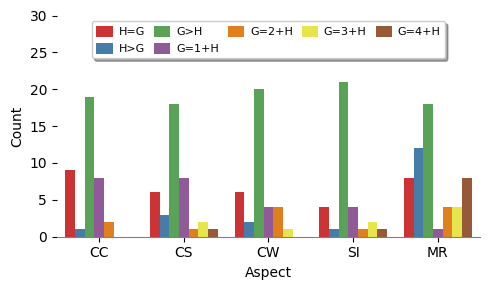

In [ ]:
aspect_names = ['CC','CS','CW','SI','MR']
plt.figure(figsize=(5, 3))

    # bar plot
splot = sns.barplot(data=df,x='Aspect', y='Values' ,hue='Category',palette="Set1")

plt.xlabel("Aspect")
plt.ylabel("Count")
plt.ylim([0,30])
    # Adjust legend to horizontal
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), fancybox=True, shadow=True, ncol=5,
           fontsize=8, handletextpad=0.5, columnspacing=0.8, handlelength=1.5, handleheight=1.2
)
ax = plt.gca()
ax.spines['bottom'].set_color("gray")
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(results_path+'gpt_high_score_P4.png',dpi = 400,bbox_inches ='tight')
plt.tight_layout()  # Ensures all elements fit within the figure area